<a href="https://colab.research.google.com/github/joseluisfalla/DSPS_JFalla/blob/main/HW3/HW3_KS_earthquakes_JFalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by FedericaBBianco @fedhere for DSPS/MLNPS
# Kolmogorov Smirnoff test, application to earthquake data

In [1]:
#all the imports I needed
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


The K-S test's Null Hypothesis tests whether two samples come from the same distribution. For the eartquakes case, the null hypothesis is that the timing between earthquakes is related to the magnitude of the earthquakes through a scaling law.


    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


Here, the statistics or pivotal quantity that the test uses is the maximum vertical distance between cumulative distributions. In this case, it corresponds to the distributions of time intervals between earthquakes at different threshold magnitudes.




    3 What does the probability distribution of this statistic depend on?
    
   


The probability distribution of this statistic depends on the assigned threshold for earthquake magnitudes and the threshold in timing between earthquake events.


    

# Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__ Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/MLPNS2021/tree/main/HW2_NHRT takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [2]:
# Retrive data from my GitHub page. Somehow I ended up with more entries that Federica's when I downloaded the data from the earthquake website. I think I did put in the time range correctly...
eq_data = pd.read_csv("https://raw.githubusercontent.com/joseluisfalla/DSPS_JFalla/main/data/earthquakes_JFalla.txt", sep=' ')

running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [4]:
eq_data.shape

(77955, 34)

In [5]:
eq_data.head()

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,Unnamed: 5,M,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,NaN,l,2.02,c,NaN,NaN,33.246,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1984/01/01,05:31:34.16,eq,NaN,l,2.12,c,NaN,NaN,32.945,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1984/01/01,06:59:05.14,eq,NaN,l,2.43,c,NaN,NaN,33.343,...,30.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1984/01/01,11:10:25.29,eq,NaN,l,2.07,c,NaN,NaN,33.668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1984/01/01,13:50:47.62,eq,NaN,l,2.25,c,NaN,NaN,35.944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
eq_data.describe()

,GT,Unnamed: 5,Unnamed: 7,Unnamed: 8,Unnamed: 9,LAT,Unnamed: 11,Unnamed: 12,Unnamed: 15,Unnamed: 16,...,Q,Unnamed: 25,EVID,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,NPH,NGRM
count,0.0,77955.000000,0.0,0.0,77955.000000,77955.000000,0.0,16801.000000,1.407500e+04,4.648500e+04,...,3395.000000,469.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,2.423602,NaN,NaN,34.043113,-116.879284,NaN,7.340063,5.450496e+06,4.466906e+06,...,43.406480,14.746269,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,0.411654,NaN,NaN,1.142951,1.052388,NaN,7.291527,3.797768e+06,3.134679e+06,...,24.256201,17.013243,2.828427,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,2.000000,NaN,NaN,30.094830,-121.760000,NaN,-2.100000,1.000432e+06,1.070000e+02,...,0.000000,0.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,2.130000,NaN,NaN,33.189000,-117.656000,NaN,-0.600000,3.042990e+06,3.025876e+06,...,24.000000,0.000000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,2.310000,NaN,NaN,34.121000,-116.587000,NaN,10.600000,3.158833e+06,3.109078e+06,...,38.000000,13.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,2.600000,NaN,NaN,34.617000,-116.273000,NaN,13.300000,9.110969e+06,9.026143e+06,...,61.000000,24.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,7.300000,NaN,NaN,37.985500,-113.719000,NaN,29.300000,3.736673e+07,9.875241e+06,...,145.000000,88.000000,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

## prepare date-time column

In [3]:
# Rename data heads and get rid of all unnecessary data.
eq_data = eq_data[['#YYY/MM/DD', 'HH:mm:SS.ss', 'Unnamed: 5']].rename({'#YYY/MM/DD':"date", 'HH:mm:SS.ss':"time", 'Unnamed: 5':"mag"}, axis=1)

In [8]:
eq_data.head()

,date,time,mag
0,1984/01/01,01:30:57.52,2.02
1,1984/01/01,05:31:34.16,2.12
2,1984/01/01,06:59:05.14,2.43
3,1984/01/01,11:10:25.29,2.07
4,1984/01/01,13:50:47.62,2.25


In [9]:
eq_data.describe()

,mag
count,77955.000000
mean,2.423602
std,0.411654
min,2.000000
25%,2.130000
50%,2.310000
75%,2.600000
max,7.300000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

In [10]:
eq_data.time.dtype, eq_data.date.dtype

(dtype('O'), dtype('O'))

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [4]:
# Create datetime object by combining date and time.
eq_data['datetime'] = [eq_data.iloc[i]['date'] + " " + eq_data.iloc[i]['time'] for i in range(len(eq_data))]

In [5]:
# Fix pesky datetimes
eq_data["datetime"] = eq_data["datetime"].str.replace("60.00","59.99")
eq_data["datetime"] = eq_data["datetime"].str.replace("24:60.99","25:00.00")

<ipython-input-5-89bac24da028>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  eq_data["datetime"] = eq_data["datetime"].str.replace("60.00","59.99")
<ipython-input-5-89bac24da028>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  eq_data["datetime"] = eq_data["datetime"].str.replace("24:60.99","25:00.00")


In [6]:
# Convert to datetime object
eq_data["datetime"] = pd.to_datetime(eq_data["datetime"])

In [16]:
eq_data.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620


In [17]:
eq_data.datetime.dtype

dtype('<M8[ns]')

## select valuable data

Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [7]:
# Range from Corral's paper
year_range = np.array([1984, 1986.5,
                       1990.3, 1992.1,
                       1994.6, 1995.6,
                       1996.1, 1996.5,
                       1997, 1997.6,
                       1997.75, 1998.15,
                       1998.25, 1999.35,
                       2000.55, 2000.8,
                       2000.9, 2001.25,
                       2001.6, 2002,
                       2002.5, 2003])

In [8]:
# Here convert decimal date to datetime object. By using the pandas function timedelta, one can reduce the number of lines of code.
ss = pd.to_datetime(year_range.astype(int), format="%Y") + pd.to_timedelta(((year_range-year_range.astype(int)) * 365.25), unit='D')

In [20]:
print("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))

the 22 timestamp pairs that are the boundaries of good data periods are:


The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like
Try:



In [19]:
a = np.array([0, 1, 2])
a, a[[True, False, True]]

(array([0, 1, 2]), array([0, 2]))

For each of the 11 valid periods I create a condition
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chinks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

In [9]:
# Store indices of dataframe that satisfy the condition (ie. stationary periods)
ids = []
for i in range(int(ss.shape[0]/2)):
  ids.extend(eq_data[(eq_data.datetime >= ss[2*i]) & (eq_data.datetime <= ss[2*i+1])].index.tolist())

In [10]:
good_dates = eq_data.iloc[ids]

In [24]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(good_dates.shape[0]))

there are 19862 earthquakes falling in the selected stationary periods


In [23]:
# your code here: broadcasting to create a dataframe with the good dates only
# Already chose the good dates ;)


In [25]:
good_dates.shape

(19862, 4)

Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events.:

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [11]:
# your code here
good_dates = good_dates[good_dates.mag >= 2]

In [27]:
good_dates.shape #look like for my data it was not needed! that is because I chose M>2 when when I downloaded the data

(19862, 4)

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (in a pandas series you can get the data as a numpy array with the attribute .values: ```seried.values```).


In [12]:
#your code here
# Get time difference between succesive events
good_dates["dates"] = good_dates["datetime"].diff()
gaps = np.diff(good_dates["datetime"].values).astype(float)

# Drop zeroth row (NaT value)
good_dates.drop(0, inplace=True)
# Reset index from dropped row
good_dates.reset_index(drop=True, inplace=True)
# Create gaps column
good_dates["gaps"] = gaps

In [32]:
good_dates.shape

(19861, 6)

In [33]:
good_dates.head()

,date,time,mag,datetime,dates,gaps
0,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,0 days 04:00:36.640000,1.443664e+13
1,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,0 days 01:27:30.980000,5.250980e+12
2,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,0 days 04:11:20.150000,1.508015e+13
3,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620,0 days 02:40:22.330000,9.622330e+12
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,0 days 05:47:32.170000,2.085217e+13


In [34]:
good_dates.describe()

,mag,dates,gaps
count,19861.000000,19861,1.986100e+04
mean,2.399065,0 days 08:23:10.212204823,3.019021e+13
std,0.391420,12 days 10:47:46.789784706,1.075667e+15
min,2.000000,0 days 00:00:00.170000,1.700000e+08
25%,2.110000,0 days 00:43:01.240000,2.581240e+12
50%,2.290000,0 days 02:21:18.160000,8.478160e+12
75%,2.560000,0 days 05:38:11.870000,2.029187e+13
max,5.800000,1388 days 04:15:56.490000,1.199386e+17


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [31]:
# your code here
# Already did this (see above)

In [42]:
good_dates.head()

,date,time,mag,datetime,dates,gaps
0,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,0 days 04:00:36.640000,1.443664e+13
1,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,0 days 01:27:30.980000,5.250980e+12
2,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,0 days 04:11:20.150000,1.508015e+13
3,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620,0 days 02:40:22.330000,9.622330e+12
4,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,0 days 05:47:32.170000,2.085217e+13


# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

Text(0.5, 1.0, 'Histogram of Earthquakes (Mag $\\geq$ 2.0)')

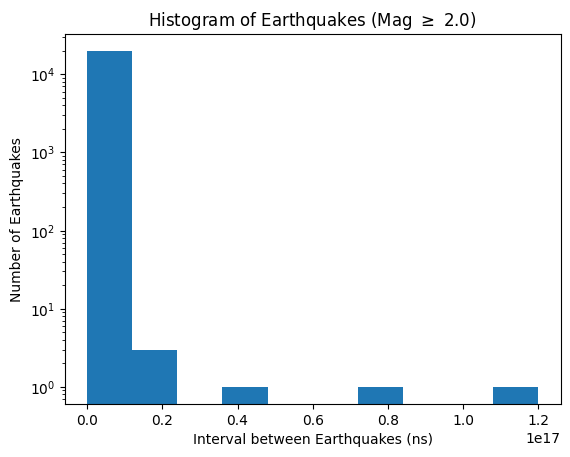

In [13]:
good_dates['gaps'].plot(kind='hist', logy=True)
pl.xlabel('Interval between Earthquakes (ns)')
pl.ylabel('Number of Earthquakes')
pl.title(r'Histogram of Earthquakes (Mag $\geq$ 2.0)')

Figure 1. Histrogram of earthquakes of magnitude greater than 2.0 for inter-event times for the years spanning 1984-2002 (included) in California. This histogram includes time gaps greater than a month.

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

In [14]:
# your code here
# Removing gaps greater than a month
month_ns = 2.628e15
good_dates = good_dates[good_dates.gaps < month_ns]

Text(0.5, 1.0, 'Histogram of Earthquakes (Mag $\\geq$ 2.0)')

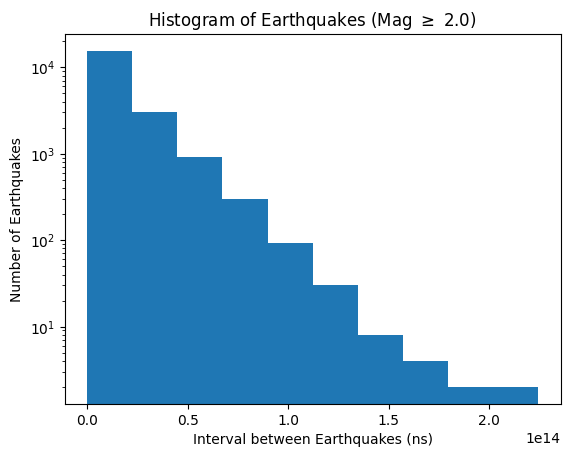

In [15]:
good_dates['gaps'].plot(kind='hist', logy=True)
pl.xlabel('Interval between Earthquakes (ns)')
pl.ylabel('Number of Earthquakes')
pl.title(r'Histogram of Earthquakes (Mag $\geq$ 2.0)')

Figure 2. Histrogram of earthquakes of magnitude greater than 2.0 for inter-event times for the years spanning 1984-2002 (included) in California. This histogram does not includes time gaps greater than a month.

# data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS/blob/master/HW3/Corral2018_pseudocode.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test. (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

In [16]:
# your code here
thresholds = [0.01, 0.001]
magnitudes = [2, 2.5, 3, 3.5, 4]

In [17]:
# Initialize table

cols = ['MAG', 'm', 'N']

for i in magnitudes:
  cols.append('M>=' + str(i))

table = pd.DataFrame(columns=cols)

In [ ]:
temp_dates = good_dates

for t in thresholds:
  for m in magnitudes:
    for k in [1, 2]:
      r_k = 1 / (good_dates[good_dates['mag'] >= m]['gaps'].mean())
      # select indices below threshold
      temp_index = good_dates[(good_dates['mag'] >= m) & (good_dates['gaps'] * r_k <= t)].index.tolist()
      # normalize gaps by r_k
      good_dates['gaps'] = np.where(((good_dates['mag'] >= m) & (good_dates['gaps'] * r_k <= t)), good_dates['gaps'] * r_k, good_dates['gaps'])
      # drop values below threshold
      good_dates.drop(temp_index, inplace=True)

# get data for tables
  for i in magnitudes:
    temp_insert = ['M>=' + str(i), t, good_dates[good_dates['mag'] >= i].shape[0]]
    for j in magnitudes:
      temp = stats.ks_2samp(np.log10(good_dates[good_dates['mag'] >= i]['gaps']), np.log10(good_dates[good_dates['mag'] >= j]['gaps']))
      if i > j:
        temp_insert.append(str(round(temp[0], 3)))
      elif j > i:
        temp_insert.append(str(round(temp[1], 3)))
      else:
        temp_insert.append('-')

    temp_insert = dict(zip(table.columns.tolist(), temp_insert))
    table = table.append(temp_insert, ignore_index=True)

    if t == 0.01:
      good_dates = temp_dates

your table here

In [19]:
table_1 = table[table['m'] == 0.01].loc[:, table.columns != 'm']
table_2 = table[table['m'] == 0.001].loc[:, table.columns != 'm']
display(table_1.style.set_table_attributes("style='display:inline'").set_caption('KS-Test (m = 0.01)'))
print("\n")
display(table_2.style.set_table_attributes("style='display:inline'").set_caption('KS-Test (m = 0.001)'))

,MAG,N,M>=2,M>=2.5,M>=3,M>=3.5,M>=4
0,M>=2,18911,-,0.04,0.106,0.091,0.538
1,M>=2.5,5646,0.021,-,0.907,0.495,0.508
2,M>=3,1428,0.033,0.017,-,0.558,0.589
3,M>=3.5,402,0.062,0.042,0.044,-,0.637
4,M>=4,110,0.076,0.078,0.075,0.078,-


,MAG,N,M>=2,M>=2.5,M>=3,M>=3.5,M>=4
5,M>=2,18911,-,0.04,0.106,0.091,0.538
6,M>=2.5,5646,0.021,-,0.907,0.495,0.508
7,M>=3,1428,0.033,0.017,-,0.558,0.589
8,M>=3.5,402,0.062,0.042,0.044,-,0.637
9,M>=4,110,0.076,0.078,0.075,0.078,-


Table 1. KS statistic *d* (below diagonal) and corresponding p-value (above diagonal) for rescaled Southern-California stationary-seismicity inter-event-time distributions, with lower cutoffs m = 0.01 (top) and m = 0.001 (bottom).

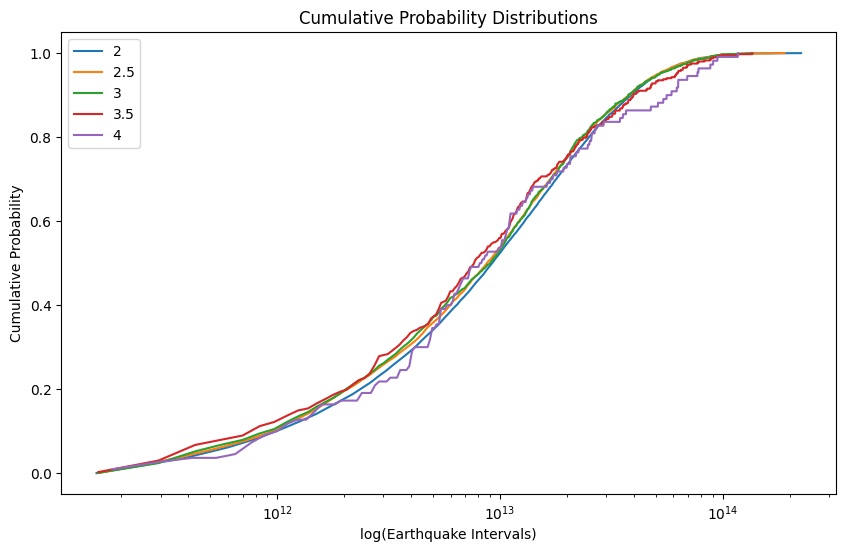

In [20]:
ax = pl.figure(figsize=(10,6)).add_subplot(111)
for m in magnitudes:
  # events with magnitude greater or equal to m
  temp = good_dates[good_dates['mag'] >= m]["gaps"]
  total = temp.shape[0]
  x_axis = np.linspace(temp.min(), temp.max(), 1000)
  y_axis = np.zeros(x_axis.size)
  for j in range(x_axis.size):
    y_axis[j] = temp[temp <= x_axis[j]].shape[0] / total

  ax.plot(x_axis, y_axis, label=m)

ax.set_xscale('log')
pl.title('Cumulative Probability Distributions')
pl.xlabel('log(Earthquake Intervals)')
pl.ylabel('Cumulative Probability')
pl.legend()

Figure 3. Rescaled inter-event-time cumulative probability distributions for Southern California stationary seismicity, with fixed threshold value of m = 0.01. The small vertical distances between distributions support the results found in Table 1.

Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? **Discuss!**

We see that there are no significant differences between distributions. We are using a 3-sigma threshold; for the case of m = 0.01 (Table 1 - top), we see p-values in the range 0.04-0.907, and for the case of m = 0.001 (Table 1 - bottom) we see something similar. This can also be seen graphically in Figure 3. Since there are no p-values below the 3-sigma threshold, there is no statistically significant differences between the distributions, and therefore we cannot reject the null hypothesis. My results are not identical to Corral's 2018 because the sample size is different (my data collection differs from the numbers cited in Corral's article). Furthermore, I do not exactly know what numerical methods (libraries, &c.) the author used, which could arise in differences. Overall, I would argue that my values are fairly similar, and while I cannot reproduce a facsimile of the results, they come pretty close.

### "extra credits"

**How could you _force_ a significant result?**
Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.

In [41]:
# your code here

pl.imshow((ks_001));
pl.axis('off')
cb = pl.colorbar()
cb.ax.set_ylabel(r'$p$-value')
pl.title("KS test results");
#add a caption

NameError: ignored


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise.
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an _unethical and horrifying practice_! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

Redoing it for threshold 0001